In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

from analysis_src.basic_inspection import data_info,data_describe
from analysis_src.missing_values import identify_missing_value
from analysis_src.bivariate_analysis import scatter_plot,box_plot
from analysis_src.univariate_analysis import count_plot,hist_plot
from analysis_src.multivariate_analysis import heatmap_pairplot

In [3]:
df = pd.read_csv('/Users/amanpreetsingh/Desktop/VSCode/Market/extracted_data/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [4]:
data_info().inspect(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null 

In [5]:
data_describe().inspect(df)


Summary Statistics (Numerical Features):
              PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.373861   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.946962   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450  

Summary Statistics (Categorical Features):
                BROKERTITLE            T

In [6]:
identify_missing_value().get_missing_value(df)


Missing Values Count by Column:
BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


Missing Values

There are no na/missing values

In [7]:
#check numerical features to find outliers before plotting

numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(numeric_features)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS']


We have 6 numerical data and 11 categorical data

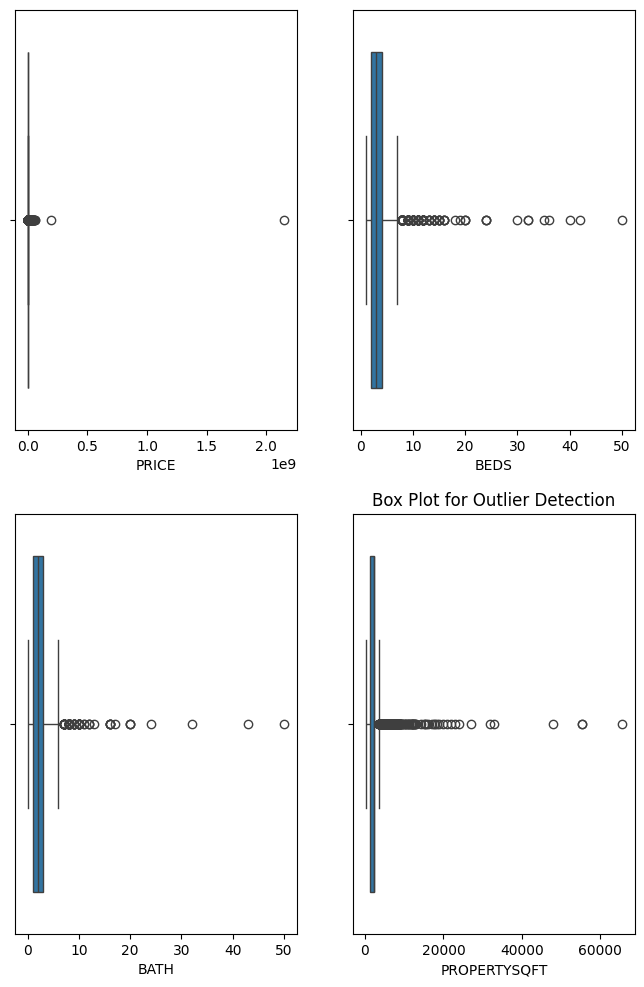

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(8, 12))  # 5 rows, 1 column


sns.boxplot(x=df['PRICE'],ax=axes[0,0])
plt.title("Box Plot for Outlier Detection")

sns.boxplot(x=df['BEDS'],ax=axes[0,1])
plt.title("Box Plot for Outlier Detection")

sns.boxplot(x=df['BATH'],ax=axes[1,0])
plt.title("Box Plot for Outlier Detection")

sns.boxplot(x=df['PROPERTYSQFT'],ax=axes[1,1])
plt.title("Box Plot for Outlier Detection")

plt.show()

Seems Like there are too many outliers
we cannot yet conclude if the outliers are important or not

furthur investigation is required

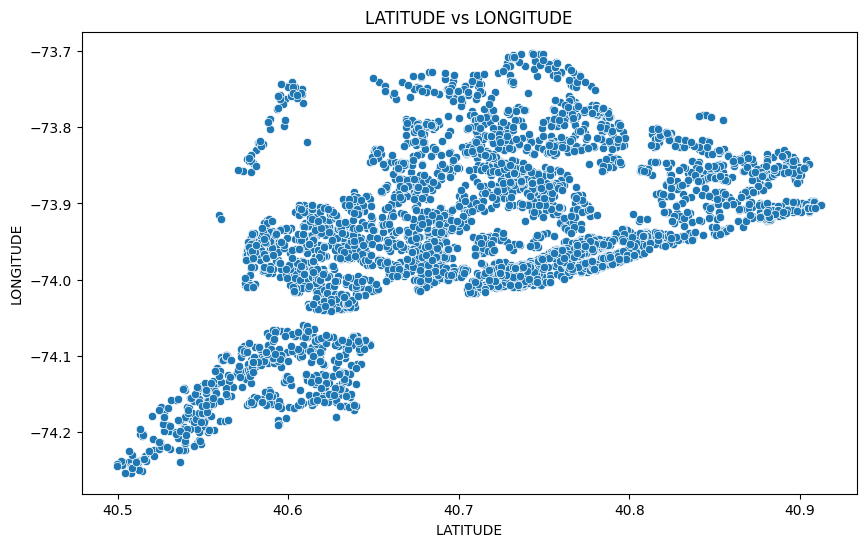

In [9]:
scatter_plot().my_plot(df,'LATITUDE','LONGITUDE')

Latitude and Longitude seems to be fine

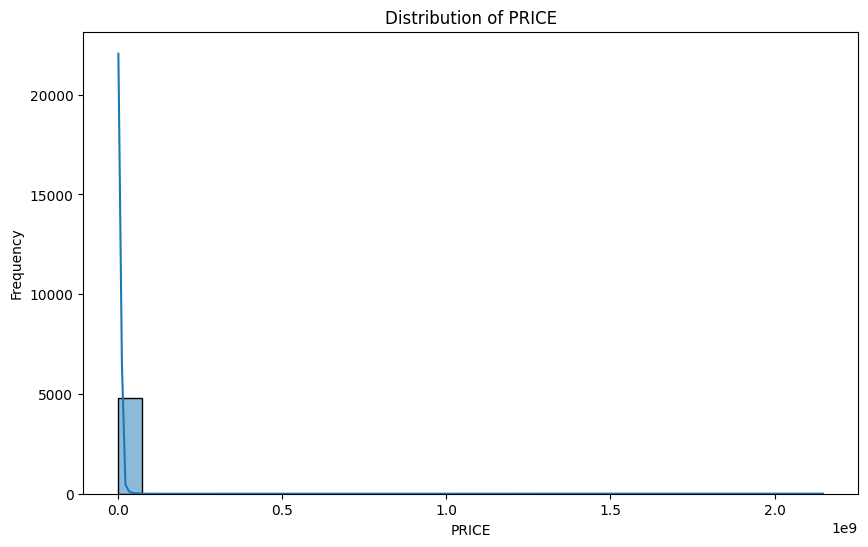

In [10]:
# univariate analysis : numerical


count_plot().my_plot(df,'PRICE')
# count_plot().my_plot(df,'BEDS')
# count_plot().my_plot(df,'BATH')
# count_plot().my_plot(df,'PROPERTYSQFT')



Seems Like all the four variables have some significant outliers 
The graphs are majorly skewed

/Users/amanpreetsingh/Desktop/VSCode/Market/analysis/analysis_src/univariate_analysis.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


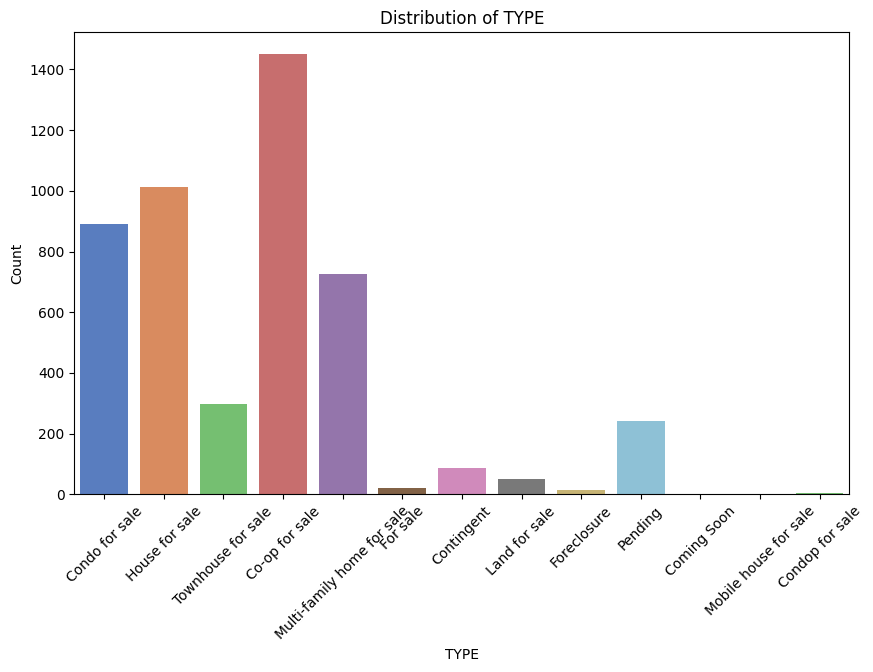

In [11]:
# univariate analysis : categorical

hist_plot().my_plot(df,'TYPE')

In [12]:
# Bivariate analysis : numerica/numerical

# scatter_plot().my_plot(df,'PRICE','BEDS')

# There was one major outlier, so I am removing that to better visualise
# outliers will be handeled later in detail

lower_limit = df['PRICE'].quantile(0.05)  # 5th percentile
upper_limit = df['PRICE'].quantile(0.95)  # 95th percentile
# Cap values
df = df[(df['PRICE'] >= lower_limit) & (df['PRICE'] <= upper_limit)]

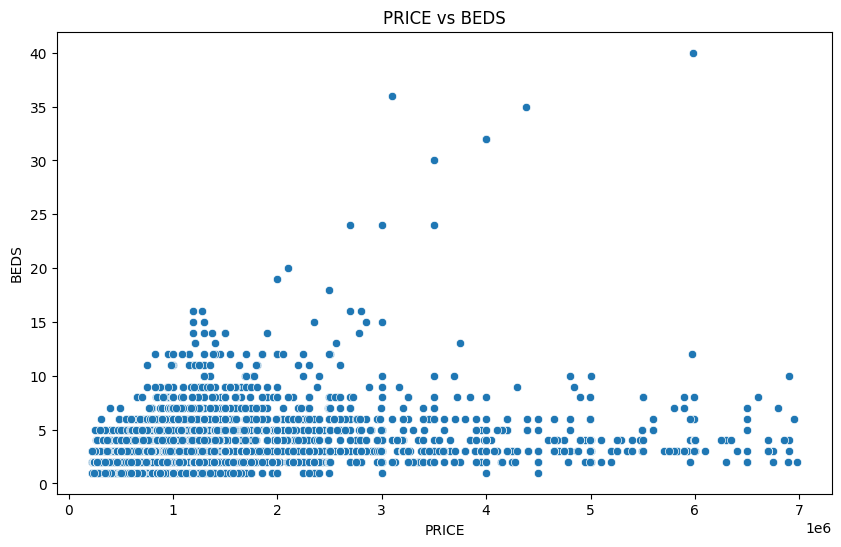

In [13]:
scatter_plot().my_plot(df,'PRICE','BEDS')

# After removing that 1 outlier

Seems like there is one outlier

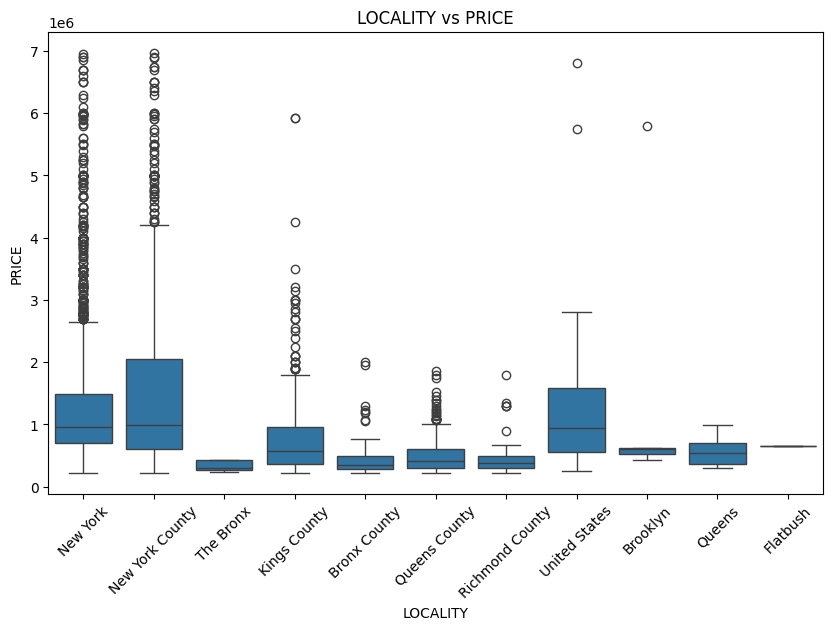

In [14]:
# Bivariate analysis : numerica/numerical

# May have to use log transformation later
# data is highly skewed

box_plot().my_plot(df,'LOCALITY','PRICE')

Summary of Insights

New York & New York County have the highest median prices and largest price variations.

Many outliers, especially in New York & United States, with prices reaching 6-7 million.

The Bronx, Kings County, and Richmond County have lower median prices, indicating more affordable markets.

Flatbush & Queens have compact price ranges, suggesting more price consistency.

Next Steps

✔ Investigate & handle outliers.

✔ Analyze price impact by property type & size.

✔ Use geospatial visualization for deeper insights.



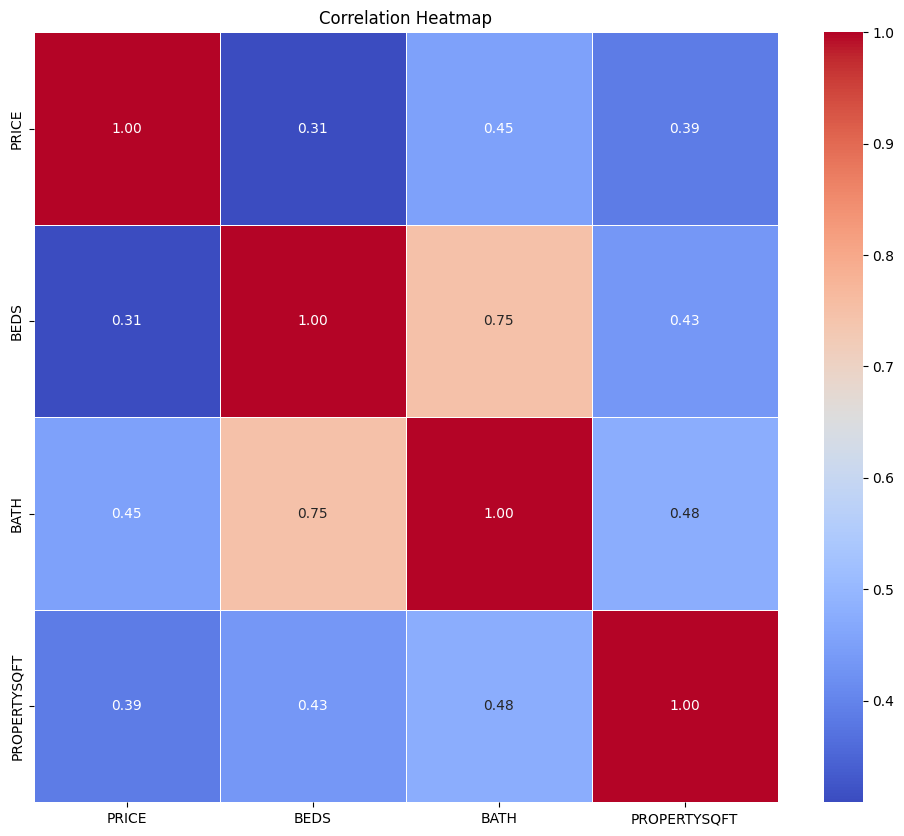

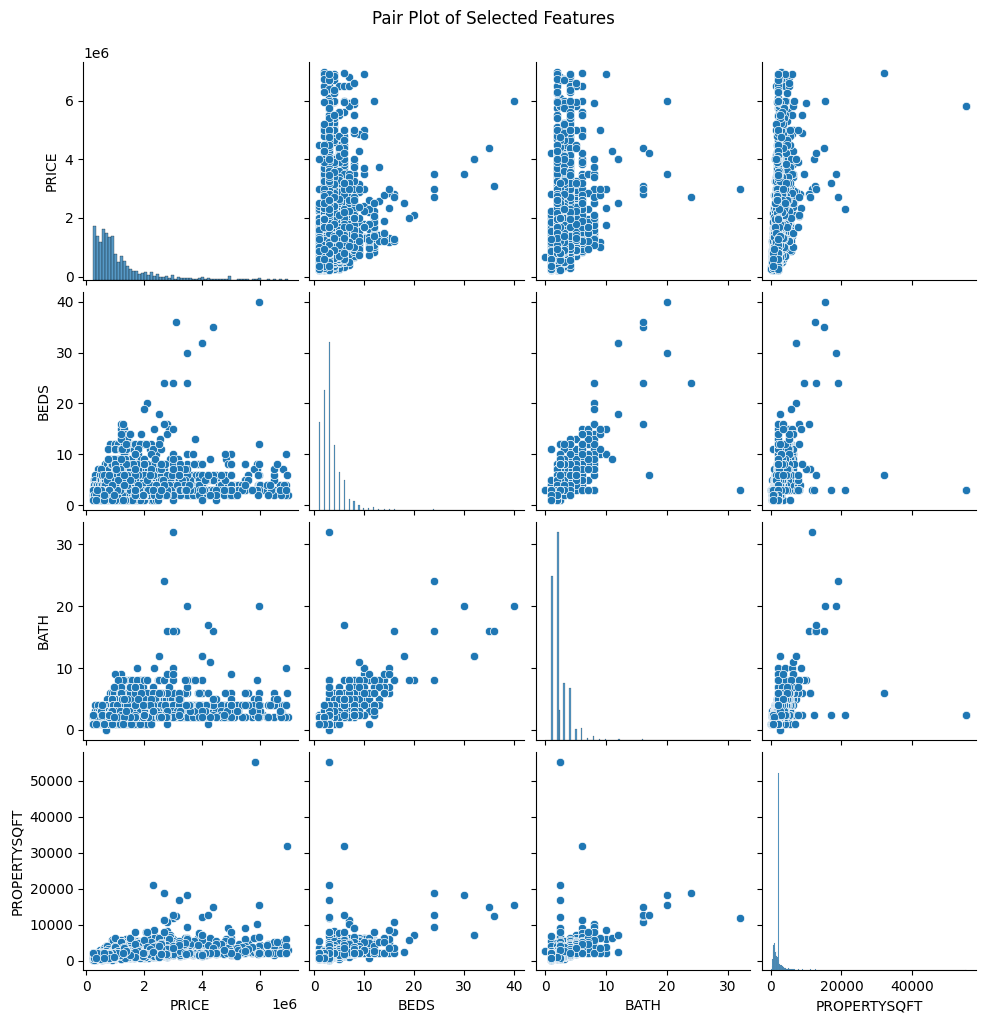

In [16]:
# multivariat analysis for selected numerical feature

selected_features = df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']]
heatmap_pairplot().generate_correlation_heatmap(selected_features)
heatmap_pairplot().generate_pairplot(selected_features)


In [17]:
'''
Insights & Next Steps
Why is PRICE not highly correlated with PROPERTY SIZE?

Possible factors: Location, view, amenities, or luxury level.

Could investigate how location or property type influences price.

Feature Engineering Ideas

Create a price per sqft feature to better assess price trends.

Look at additional variables (e.g., neighborhood, year built) to improve predictions.

'''

'\nInsights & Next Steps\nWhy is PRICE not highly correlated with PROPERTY SIZE?\n\nPossible factors: Location, view, amenities, or luxury level.\n\nCould investigate how location or property type influences price.\n\nFeature Engineering Ideas\n\nCreate a price per sqft feature to better assess price trends.\n\nLook at additional variables (e.g., neighborhood, year built) to improve predictions.\n\n'

# Potential Issues to Handle Later


Multicollinearity Risk (BEDS & BATH: 0.75)

* High correlation between BEDS & BATH suggests redundancy.

* Issue: Could cause instability in regression models.

* Solution: Consider dropping one of them or using Principal Component Analysis (PCA).



Outliers in PRICE

* Issue: Luxury properties may skew the model predictions.

* Solution: Cap extreme values using winsorization. Log-transform price for a more normal distribution.


Need for Feature Engineering

* PRICE per SQFT could be a more informative feature than raw PRICE.

* Solution: Create new features such as:

* PRICE_PER_SQFT = PRICE / PROPERTYSQFT

* Interaction Terms: (e.g., BATH * BEDS for home size complexity).


Potential Missing Values

* Some properties might have missing values for price, size, etc.

* Solution: Use median/mode imputation. If missingness is significant, explore why & decide whether to drop them.


Distribution of Target Variable (PRICE)

* If PRICE is skewed (high-end luxury properties), models may perform poorly.

* Solution: Apply log transformation (log(PRICE)) for normalization.


** Next Steps

Try a regression model with feature engineering.

Check for heteroscedasticity (non-constant variance in PRICE).

Experiment with clustering or segmentation to see patterns.